## General network properties: Size, Degree

For all interactomes:
* Number of connected components
* Size of the largest connected component
* Relative size of the largest connected component
* Average size of the connected components
* Size of the smallest component
* Number of isolated nodes

For all pathways:
- Sizes of connected components for all pathways

In [12]:
import pandas as pd
import seaborn as sns

import config
from config import LEVELS, GRAPHS_PATH
from lib.networks import get_interactomes, get_combinations, get_combinations_with_pathways
from lib.networks import get_multiindex
from lib.networks import get_sizes

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

config.set_root_wd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [13]:
index = get_multiindex()
interactomes_no_sm, interactomes_with_sm, interactomes_with_unique_sm = get_interactomes(GRAPHS_PATH)
interactomes = [*interactomes_no_sm.values(), *interactomes_with_sm.values(), *interactomes_with_unique_sm.values()]

In [14]:
num_interactions, num_entities, num_small_molecules = get_sizes(interactomes, index)
num_interactions

Small Molecules           Entity Level
Not Included              genes            453137
                          proteins         462430
                          proteoforms      677057
Included                  genes            528969
                          proteins         538874
                          proteoforms      759198
Reaction-Unique Included  genes            839401
                          proteins         853568
                          proteoforms     1077886
dtype: int64

In [15]:
df_sizes = pd.DataFrame({
    "Interactions": num_interactions,
    "Accessioned Entities": num_entities,
    "Small Molecules": num_small_molecules
}, index=index)
df_sizes.columns.name = "Sizes"
df_sizes

Sizes                                  Interactions  Accessioned Entities  \
Small Molecules          Entity Level                                       
Not Included             genes               453137                 10968   
                         proteins            462430                 11066   
                         proteoforms         677057                 14295   
Included                 genes               528969                 10968   
                         proteins            538874                 11066   
                         proteoforms         759198                 14295   
Reaction-Unique Included genes               839401                 10968   
                         proteins            853568                 11066   
                         proteoforms        1077886                 14295   

Sizes                                  Small Molecules  
Small Molecules          Entity Level                   
Not Included             genes                       0  
                         proteins                    0  
                         proteoforms                 0  
Included                 genes                    1965  
                         proteins                 1965  
                         proteoforms              1965  
Reaction-Unique Included genes                   28110  
                         proteins                28110  
                         proteoforms             28110

In [16]:
# Create a list with the number of genes, proteins, proteoforms, small molecules
num_nodes = [*df_sizes.loc[['Not Included']]["Accessioned Entities"], df_sizes.loc[['Included']]["Small Molecules"][0]]

# Create list with all levels:
node_types = [*LEVELS, "small molecules"]

# Create a list with the number of interactions without the small molecules
num_interactions_no_sm = df_sizes.loc[['Not Included']]["Interactions"]

num_interactions_with_sm = df_sizes.loc[['Included']]["Interactions"]

maxy = max([*num_interactions_with_sm, *num_interactions_no_sm])

maxy = 800000

<ipython-input-17-8991b48bd7fb>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot2.set_xticklabels(LEVELS, rotation=45)
<ipython-input-17-8991b48bd7fb>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot3.set_xticklabels(LEVELS, rotation=45)


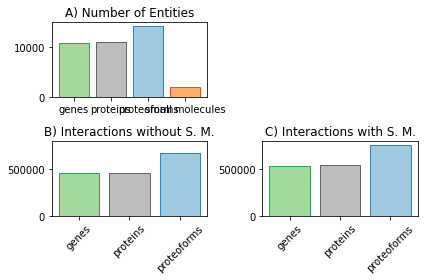

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from config import COLORS_BORDER

figure, axis = plt.subplots(1, 4)
# Placing the plots in the plane
plot1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1)

# Plot number of nodes
plot1.bar(node_types, num_nodes, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot1.set_title('A) Number of Entities')

plt.xticks(rotation=90)

# Plot number of interactions without small molecules
plot2.bar(LEVELS, num_interactions_no_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot2.set_title('B) Interactions without S. M.')
plot2.set_ylim([0, maxy])
plot2.set_xticklabels(LEVELS, rotation=45)

# Plot number of interactions with small molecules
plot3.bar(LEVELS, num_interactions_with_sm, color=config.COLORS_FILL, edgecolor=COLORS_BORDER)
plot3.set_title('C) Interactions with S. M.')
plot3.set_ylim([0, maxy])
plot3.set_xticklabels(LEVELS, rotation=45)

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()

figure.savefig('figures/figure_4.png')
plt.close()

In [18]:
from lib.networks import get_increase_percentage
from config import genes, proteins, proteoforms

increase = get_increase_percentage(interactomes_no_sm[genes].number_of_nodes(),
                                   interactomes_no_sm[proteins].number_of_nodes())
print(f"There are {increase} % more nodes in the protein interactome than in the gene interactome.")

increase = get_increase_percentage(interactomes_no_sm[genes].number_of_edges(),
                                   interactomes_no_sm[proteins].number_of_edges())
print(f"There are {increase} % more interactions in the protein interactome than in the gene interactome.")

increase = get_increase_percentage(interactomes_no_sm[proteins].number_of_nodes(),
                                   interactomes_no_sm[proteoforms].number_of_nodes())
print(f"There are {increase} % more nodes in the proteoform interactome than in the protein interactome.")

increase = get_increase_percentage(interactomes_no_sm[proteins].number_of_edges(),
                                   interactomes_no_sm[proteoforms].number_of_edges())
print(f"There are {increase} % more interactions in the proteoform interactome than in the protein interactome.")

There are 0.89 % more nodes in the protein interactome than in the gene interactome.
There are 2.01 % more interactions in the protein interactome than in the gene interactome.
There are 22.59 % more nodes in the proteoform interactome than in the protein interactome.
There are 31.7 % more interactions in the proteoform interactome than in the protein interactome.


In [19]:
for l in LEVELS:
    increase_generic = get_increase_percentage(
        interactomes_no_sm[l].number_of_nodes(),
        interactomes_with_sm[l].number_of_nodes()
    )
    print(f"In the {l} network, there is an increase of {increase_generic} % more nodes when adding generic small molecules")
    increase_unique = get_increase_percentage(
        interactomes_no_sm[l].number_of_nodes(),
        interactomes_with_unique_sm[l].number_of_nodes()
    )
    print(f"In the {l} network, there is an increase of {increase_unique} % more nodes when adding reaction-unique small molecules")

increase_with_generic_sm = [get_increase_percentage(
        interactomes_no_sm[l].number_of_nodes(),
        interactomes_with_sm[l].number_of_nodes()
    ) for l in LEVELS]
percentage_generic_sm = [
    (interactomes_with_sm[l].number_of_nodes() - interactomes_no_sm[l].number_of_nodes()) / interactomes_with_sm[l].number_of_nodes()
    for l in LEVELS]
increase_with_unique_sm = [get_increase_percentage(
        interactomes_no_sm[l].number_of_nodes(),
        interactomes_with_unique_sm[l].number_of_nodes()
    ) for l in LEVELS]
percentage_unique_sm = [
    (interactomes_with_unique_sm[l].number_of_nodes() - interactomes_no_sm[l].number_of_nodes()) / interactomes_with_unique_sm[l].number_of_nodes()
    for l in LEVELS]

d = {
    "Increase of nodes with generic small molecules": increase_with_generic_sm,
    "Percentage of generic small molecule nodes": percentage_generic_sm,
    "Increase of nodes with unique small molecules": increase_with_unique_sm,
    "Percentage of unique small molecule nodes ": percentage_unique_sm
}

df_increase_sm = pd.DataFrame(data=d, index=LEVELS)
df_increase_sm


In the genes network, there is an increase of 15.19 % more nodes when adding generic small molecules
In the genes network, there is an increase of 71.93 % more nodes when adding reaction-unique small molecules
In the proteins network, there is an increase of 15.08 % more nodes when adding generic small molecules
In the proteins network, there is an increase of 71.75 % more nodes when adding reaction-unique small molecules
In the proteoforms network, there is an increase of 12.08 % more nodes when adding generic small molecules
In the proteoforms network, there is an increase of 66.29 % more nodes when adding reaction-unique small molecules


,Increase of nodes with generic small molecules,Percentage of generic small molecule nodes,Increase of nodes with unique small molecules,Percentage of unique small molecule nodes
genes,15.19,0.15,71.93,0.72
proteins,15.08,0.15,71.75,0.72
proteoforms,12.08,0.12,66.29,0.66


In [20]:
from statistics import mean
from lib.dictionaries import read_dictionary_one_to_set

map_genes_to_proteins = read_dictionary_one_to_set(config.GRAPHS_PATH, "mapping_proteins_to_genes.tsv",
                                                   col_indices=(1, 0))
print(f"There are {len(map_genes_to_proteins.keys())} genes in the map.")

avg_proteins_per_gene = round(mean([len(map_genes_to_proteins[key]) for key in map_genes_to_proteins.keys()]), 2)
print(f"The average number of proteins per gene is {avg_proteins_per_gene}")

There are 10968 genes in the map.
The average number of proteins per gene is 1.01


In [21]:
map_proteins_to_proteoforms = read_dictionary_one_to_set(config.GRAPHS_PATH, "mapping_proteins_to_proteoforms.tsv",
                                                         col_indices=(0, 1))
print(f"There are {len(map_proteins_to_proteoforms.keys())} proteins in the map.")

avg_proteoforms_per_protein = round(
    mean([len(map_proteins_to_proteoforms[key]) for key in map_proteins_to_proteoforms.keys()]), 2)
print(f"The average number of proteoforms per protein is {avg_proteoforms_per_protein}")

There are 11066 proteins in the map.
The average number of proteoforms per protein is 1.29


# Degree

In [22]:
degree_sequences = []
for interactome in interactomes:
    accessioned_nodes = [node for node, data in interactome.nodes(data=True) if not data['type'].startswith("Simple")]
    sequence = sorted([d for n, d in interactome.degree(accessioned_nodes)], reverse=True)
    degree_sequences.append(sequence)

degree_sequences = pd.Series([sorted(sequence, reverse=True) for sequence in degree_sequences], index=index)
degree_sequences

Small Molecules           Entity Level
Not Included              genes           [1241, 1218, 1057, 1057, 902, 892, 586, 578, 5...
                          proteins        [1242, 1219, 1058, 1058, 904, 894, 594, 578, 5...
                          proteoforms     [1469, 1444, 1279, 1279, 915, 898, 627, 619, 6...
Included                  genes           [1293, 1270, 1106, 1106, 1035, 1024, 638, 614,...
                          proteins        [1294, 1271, 1107, 1107, 1037, 1026, 638, 616,...
                          proteoforms     [1520, 1495, 1327, 1327, 1048, 1030, 743, 716,...
Reaction-Unique Included  genes           [1920, 1890, 1809, 1769, 1559, 1559, 1498, 148...
                          proteins        [1922, 1892, 1810, 1770, 1560, 1560, 1500, 148...
                          proteoforms     [2029, 1987, 1933, 1896, 1773, 1773, 1494, 148...
dtype: object

In [23]:
i = interactomes_no_sm["genes"]
df = pd.DataFrame(data=list(i.degree()), columns=['Node', 'Degree'])
df.sort_values(by=['Degree'], inplace=True)
df

,Node,Degree
5483,GPR35,0
4091,AOC3,0
4092,BPHL,0
4093,CMBL,0
4097,NQO2,0
...,...,...
1041,GNB1,902
62,UBB,1057
61,UBC,1057
63,UBA52,1218


In [24]:
print(f"(Genes, No SM) {interactomes_no_sm['genes'].degree['GPR35']}")
print(f"Neighbours: {[n for n in interactomes_no_sm['genes'].neighbors('GPR35')]}")
print(f"(Genes, With SM) {interactomes_with_sm['genes'].degree['GPR35']}")
print(f"Neighbours: {[n for n in interactomes_with_sm['genes'].neighbors('GPR35')]}")
print(f"(Genes, With Unique SM) {interactomes_with_unique_sm['genes'].degree['GPR35']}")
print(f"Neighbours: {[n for n in interactomes_with_unique_sm['genes'].neighbors('GPR35')]}")


(Genes, No SM) 0
Neighbours: []
(Genes, With SM) 1
Neighbours: ['sm_Kynurenic_acid']
(Genes, With Unique SM) 2
Neighbours: ['sm_R-HSA-6805205_Kynurenic_acid', 'sm_R-HSA-6805208_Kynurenic_acid']


In [25]:
mins = pd.Series([min(degree_sequence) for degree_sequence in degree_sequences], index=index)
maxs = pd.Series([max(degree_sequence) for degree_sequence in degree_sequences], index=index)
avgs = pd.Series([sum(degree_sequence) / len(degree_sequence) for degree_sequence in degree_sequences], index=index)

df_degrees = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=index)
df_degrees


Min   Max    Avg
Small Molecules          Entity Level                  
Not Included             genes           0  1241  82.63
                         proteins        0  1242  83.58
                         proteoforms     0  1469  94.73
Included                 genes           0  1293  88.31
                         proteins        0  1294  89.26
                         proteoforms     0  1520  99.53
Reaction-Unique Included genes           0  1920 112.64
                         proteins        0  1922 113.77
                         proteoforms     0  2029 118.77

In [26]:
df_seq = pd.DataFrame({"Sequence": degree_sequences})
df_seq.reset_index(inplace=True)
lst_col = 'Sequence'

df_seq = pd.DataFrame({
    col: np.repeat(df_seq[col].values, df_seq[lst_col].str.len())
    for col in df_seq.columns.drop(lst_col)}
).assign(**{lst_col: np.concatenate(df_seq[lst_col].values)})[df_seq.columns]

df_seq = df_seq.rename(columns={'Sequence': 'Degree'})
df_seq['Degree'] = df_seq['Degree'].apply(lambda x: 0 if x == 0 else np.log10(x))

df_seq

,Small Molecules,Entity Level,Degree
0,Not Included,genes,3.09
1,Not Included,genes,3.09
2,Not Included,genes,3.02
3,Not Included,genes,3.02
4,Not Included,genes,2.96
...,...,...,...
108982,Reaction-Unique Included,proteoforms,0.00
108983,Reaction-Unique Included,proteoforms,0.00
108984,Reaction-Unique Included,proteoforms,0.00
108985,Reaction-Unique Included,proteoforms,0.00


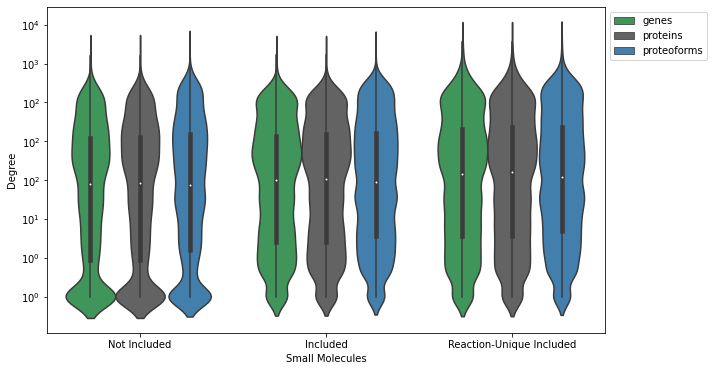

In [27]:
from matplotlib import ticker as mticker

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
fig.set_size_inches(10, 6)
fig5 = sns.violinplot(x="Small Molecules", y="Degree", hue="Entity Level", data=df_seq, palette=config.COLORS_BORDER)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))  # Convert ticks to powers of 10
plt.legend(bbox_to_anchor=(1.0, 1), borderaxespad=0.5)  # Put the legend out of the figure
plt.show()
fig5.figure.savefig('figures/figure_5.png')

In [29]:
from pathlib import Path
from config import METHODS, PATHWAY_GRAPHS_PATH
from config import LEVELS
from lib.networks import get_json_filename, create_pathway_interaction_network, read_graph, \
    get_pathways_with_multiple_proteoforms
from lib.graph_database_access import get_pathways

columns = [
    'Pathway',
    'Small Molecules',
    'Increase Nodes Genes-Proteins',
    'Increase Interactions Genes-Proteins',
    'Increase Nodes Proteins-Proteoforms',
    'Increase Interactions Proteins-Proteoforms'
]


def get_pathway_tuples(pathway, graphs):
    increase_nodes_genes_proteins = get_increase_percentage(graphs[genes].number_of_nodes(),
                                                            graphs[proteins].number_of_nodes())
    increase_links_genes_proteins = get_increase_percentage(graphs[genes].number_of_edges(),
                                                            graphs[proteins].number_of_edges())
    increase_nodes_proteins_proteoforms = get_increase_percentage(graphs[proteins].number_of_nodes(),
                                                                  graphs[proteoforms].number_of_nodes())
    increase_links_proteins_proteoforms = get_increase_percentage(graphs[proteoforms].number_of_edges(),
                                                                  graphs[proteoforms].number_of_edges())

    return (
        pathway,
        graphs[genes].graph["method"],
        increase_nodes_genes_proteins,
        increase_links_genes_proteins,
        increase_nodes_proteins_proteoforms,
        increase_links_proteins_proteoforms
    )


data_pathways = []
# pathways = get_pathways()["stId"]
pathways = get_pathways_with_multiple_proteoforms()
for pathway in pathways:
    for method in METHODS:
        pathway_graphs = {}
        for level in LEVELS:
            filename = get_json_filename(level, method, PATHWAY_GRAPHS_PATH, pathway)
            if not Path(filename).exists():
                create_pathway_interaction_network(pathway, level, method, PATHWAY_GRAPHS_PATH)
            G = read_graph(filename)
            pathway_graphs[level] = G
        if pathway_graphs[genes].number_of_nodes() > 0\
                and pathway_graphs[genes].number_of_edges() > 0\
                and pathway_graphs[genes].number_of_nodes() < 20:
            data_pathways.append(get_pathway_tuples(pathway, pathway_graphs))

df_pathways = pd.DataFrame.from_records(data_pathways, columns=columns)
df_pathways

,Pathway,Small Molecules,Increase Nodes Genes-Proteins,Increase Interactions Genes-Proteins,Increase Nodes Proteins-Proteoforms,Increase Interactions Proteins-Proteoforms
0,R-HSA-8934903,no_sm,0.00,0.00,21.43,0.00
1,R-HSA-8934903,with_sm,0.00,0.00,18.75,0.00
2,R-HSA-8934903,with_unique_sm,0.00,0.00,15.00,0.00
3,R-HSA-9613354,no_sm,0.00,0.00,25.00,0.00
4,R-HSA-9613354,with_sm,0.00,0.00,20.00,0.00
...,...,...,...,...,...,...
1675,R-HSA-190861,with_sm,0.00,0.00,0.00,0.00
1676,R-HSA-190861,with_unique_sm,0.00,0.00,0.00,0.00
1677,R-HSA-190827,no_sm,0.00,0.00,0.00,0.00
1678,R-HSA-190827,with_sm,0.00,0.00,0.00,0.00


In [30]:
from bokeh.io import show
from visualization.visualize_single_network import Coloring, plot_pathway_all_levels
from lib.networks import create_pathway_interaction_networks

# Example nodes genes-proteins
df_pathways.sort_values(by=['Increase Nodes Genes-Proteins'], ascending=False, inplace=True)
examples = df_pathways.head(20)["Pathway"].unique()
print(examples)

for example in examples:
    graphs = create_pathway_interaction_networks(example, "resources/pathway_networks/")
    p = plot_pathway_all_levels(example, out_path="resources/pathway_networks/", graphs=graphs,
                                coloring=Coloring.ENTITY_TYPE, outline_line_width=1,
                                node_size = 12,
                                inner_plot_size=350,
                                highlight_articulations=True,
                                highlight_bridges=True,
                                toolbar_location='below')
    show(p)
df_pathways.head(20)

['R-HSA-1236977' 'R-HSA-947581' 'R-HSA-392851' 'R-HSA-8934903'
 'R-HSA-9637628' 'R-HSA-9673768' 'R-HSA-9673770' 'R-HSA-9673766'
 'R-HSA-9673767' 'R-HSA-9636569' 'R-HSA-1839120']
-- Creating interaction networks for pathway R-HSA-1236977
Generated figure: resources/pathway_networks/R-HSA-1236977_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-947581
Generated figure: resources/pathway_networks/R-HSA-947581_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-392851
Generated figure: resources/pathway_networks/R-HSA-392851_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-8934903
Generated figure: resources/pathway_networks/R-HSA-8934903_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-9637628
Generated figure: resources/pathway_networks/R-HSA-9637628_ENTITY_TYPE_network.html
-- Creating interaction networks for pathway R-HSA-9673768
Generated figure: resources/pathway_networks/R-HSA-9

,Pathway,Small Molecules,Increase Nodes Genes-Proteins,Increase Interactions Genes-Proteins,Increase Nodes Proteins-Proteoforms,Increase Interactions Proteins-Proteoforms
726,R-HSA-1236977,no_sm,84.81,98.74,0.00,0.00
727,R-HSA-1236977,with_sm,80.72,97.88,0.00,0.00
1266,R-HSA-947581,no_sm,14.29,33.33,30.00,0.00
1472,R-HSA-392851,no_sm,5.00,10.00,0.00,0.00
0,R-HSA-8934903,no_sm,0.00,0.00,21.43,0.00
1115,R-HSA-9637628,with_unique_sm,0.00,0.00,0.00,0.00
1125,R-HSA-9673768,with_unique_sm,0.00,0.00,46.15,0.00
1124,R-HSA-9673768,with_sm,0.00,0.00,46.15,0.00
1123,R-HSA-9673768,no_sm,0.00,0.00,54.55,0.00
1122,R-HSA-9673770,with_sm,0.00,0.00,10.00,0.00


In [31]:
df_pathways.sort_values(by=['Increase Nodes Proteins-Proteoforms'], ascending=False, inplace=True)
examples = df_pathways.head(10)["Pathway"].unique()
print(examples)
df_pathways[["Pathway", "Increase Nodes Proteins-Proteoforms", "Increase Interactions Proteins-Proteoforms"]].head(20)

['R-HSA-69200' 'R-HSA-3000480' 'R-HSA-444257' 'R-HSA-2214320'
 'R-HSA-1912399' 'R-HSA-9673768']


,Pathway,Increase Nodes Proteins-Proteoforms,Increase Interactions Proteins-Proteoforms
52,R-HSA-69200,77.78,0.00
54,R-HSA-69200,70.00,0.00
53,R-HSA-69200,70.00,0.00
828,R-HSA-3000480,64.81,0.00
591,R-HSA-444257,63.16,0.00
1446,R-HSA-2214320,61.11,0.00
1447,R-HSA-2214320,61.11,0.00
1448,R-HSA-2214320,61.11,0.00
789,R-HSA-1912399,57.14,0.00
1123,R-HSA-9673768,54.55,0.00


In [32]:
df_pathways.sort_values(by=['Increase Interactions Proteins-Proteoforms'], ascending=False, inplace=True)
df_pathways[["Pathway", "Increase Nodes Proteins-Proteoforms", "Increase Interactions Proteins-Proteoforms"]].head(12)

,Pathway,Increase Nodes Proteins-Proteoforms,Increase Interactions Proteins-Proteoforms
52,R-HSA-69200,77.78,0.00
680,R-HSA-71032,0.00,0.00
992,R-HSA-162592,0.00,0.00
991,R-HSA-162594,0.00,0.00
970,R-HSA-9694635,0.00,0.00
1025,R-HSA-8869496,0.00,0.00
957,R-HSA-9683686,0.00,0.00
958,R-HSA-9683686,0.00,0.00
1034,R-HSA-8952158,0.00,0.00
1033,R-HSA-8949275,0.00,0.00


In [33]:
combinations = get_combinations()
columns = [
    "Small Molecules",
    "Entity Level",
    "Min. Degree Accessioned Entities",
    "Avg. Degree Accessioned Entities",
    "Max. Degree Accessioned Entities",
    "Min. Degree Small Molecules",
    "Avg. Degree Small Molecules",
    "Max. Degree Small Molecules"
]

def get_tuples(G):

    acc_ents = list(G.nodes)
    sm_ents = []
    if G.graph['num_small_molecules'] > 0:
        acc_ents = [n for n in G.nodes if not G.nodes[n]['type'].startswith("Simple")]
        sm_ents = [n for n in G.nodes if G.nodes[n]['type'].startswith("Simple")]

    deg_seq_acc_ents = [d for n, d in list(G.degree(acc_ents))]

    min_deg_sm_ents = 0
    avg_deg_sm_ents = 0
    max_deg_sm_ents = 0
    if len(sm_ents) > 0:
        deg_seq_sm_ents = [d for n, d in list(G.degree(sm_ents))]
        min_deg_sm_ents = min(deg_seq_sm_ents)
        avg_deg_sm_ents = mean(deg_seq_sm_ents)
        max_deg_sm_ents = max(deg_seq_sm_ents)

    return (
        G.graph["method"], G.graph["level"],
        min(deg_seq_acc_ents), mean(deg_seq_acc_ents), max(deg_seq_acc_ents),
        min_deg_sm_ents, avg_deg_sm_ents, max_deg_sm_ents
    )

In [34]:
df_deg_interactomes = pd.DataFrame([get_tuples(I) for I in interactomes], columns=columns, index=index)
df_deg_interactomes.drop(["Small Molecules","Entity Level"], axis=1)

Min. Degree Accessioned Entities  \
Small Molecules          Entity Level                                     
Not Included             genes                                        0   
                         proteins                                     0   
                         proteoforms                                  0   
Included                 genes                                        0   
                         proteins                                     0   
                         proteoforms                                  0   
Reaction-Unique Included genes                                        0   
                         proteins                                     0   
                         proteoforms                                  0   

                                       Avg. Degree Accessioned Entities  \
Small Molecules          Entity Level                                     
Not Included             genes                                    82.63   
                         proteins                                 83.58   
                         proteoforms                              94.73   
Included                 genes                                    88.31   
                         proteins                                 89.26   
                         proteoforms                              99.53   
Reaction-Unique Included genes                                   112.64   
                         proteins                                113.77   
                         proteoforms                             118.77   

                                       Max. Degree Accessioned Entities  \
Small Molecules          Entity Level                                     
Not Included             genes                                     1241   
                         proteins                                  1242   
                         proteoforms                               1469   
Included                 genes                                     1293   
                         proteins                                  1294   
                         proteoforms                               1520   
Reaction-Unique Included genes                                     1920   
                         proteins                                  1922   
                         proteoforms                               2029   

                                       Min. Degree Small Molecules  \
Small Molecules          Entity Level                                
Not Included             genes                                   0   
                         proteins                                0   
                         proteoforms                             0   
Included                 genes                                   0   
                         proteins                                0   
                         proteoforms                             0   
Reaction-Unique Included genes                                   0   
                         proteins                                0   
                         proteoforms                             0   

                                       Avg. Degree Small Molecules  \
Small Molecules          Entity Level                                
Not Included             genes                                0.00   
                         proteins                             0.00   
                         proteoforms                          0.00   
Included                 genes                               45.48   
                         proteins                            45.79   
                         proteoforms                         48.69   
Reaction-Unique Included genes                               15.77   
                         proteins                            15.94   
                         proteoforms                         16.29   

                   

In [35]:
for method in config.SMALL_MOLECULES:
    print(f"Small Molecules: {method}")
    avg_genes = df_deg_interactomes.loc[method,'genes']["Avg. Degree Accessioned Entities"]
    avg_proteins = df_deg_interactomes.loc[method,'proteins']["Avg. Degree Accessioned Entities"]
    avg_proteoforms = df_deg_interactomes.loc[method,'proteoforms']["Avg. Degree Accessioned Entities"]
    inc_genes_proteins = get_increase_percentage(avg_genes, avg_proteins)
    inc_proteins_proteoforms = get_increase_percentage(avg_proteins, avg_proteoforms)
    print(f"There is an increase of degree: {inc_genes_proteins}% from genes to proteins")
    print(f"There is an increase of degree: {inc_proteins_proteoforms}% from proteins to proteoforms")


Small Molecules: Not Included
There is an increase of degree: 1.13% from genes to proteins
There is an increase of degree: 11.77% from proteins to proteoforms
Small Molecules: Included
There is an increase of degree: 1.07% from genes to proteins
There is an increase of degree: 10.31% from proteins to proteoforms
Small Molecules: Reaction-Unique Included
There is an increase of degree: 0.99% from genes to proteins
There is an increase of degree: 4.22% from proteins to proteoforms


In [36]:
combinations = get_combinations_with_pathways(3)

columns = [
    "Small Molecules",
    "Entity Level",
    "Pathway",
    "Min. Degree Accessioned Entities",
    "Avg. Degree Accessioned Entities",
    "Max. Degree Accessioned Entities",
    "Min. Degree Small Molecules",
    "Avg. Degree Small Molecules",
    "Max. Degree Small Molecules"
]

out_path = "resources/pathway_networks/"

def get_tuples(combination):
    G = create_pathway_interaction_network(
        method=combination[0], level=combination[1], pathway=combination[2], out_path=out_path
    )

    acc_ents = list(G.nodes)
    sm_ents = []
    if G.graph['num_small_molecules'] > 0:
        acc_ents = [n for n in G.nodes if not G.nodes[n]['type'].startswith("Simple")]
        sm_ents = [n for n in G.nodes if G.nodes[n]['type'].startswith("Simple")]

    deg_seq_acc_ents = [d for n, d in list(G.degree(acc_ents))]
    min_deg_sm_ents = 0
    avg_deg_sm_ents = 0
    max_deg_sm_ents = 0
    if len(sm_ents) > 0:
        deg_seq_sm_ents = [d for n, d in list(G.degree(sm_ents))]
        min_deg_sm_ents = min(deg_seq_sm_ents)
        avg_deg_sm_ents = mean(deg_seq_sm_ents)
        max_deg_sm_ents = max(deg_seq_sm_ents)

    return (
        combination[0], combination[1], combination[2],
        min(deg_seq_acc_ents), mean(deg_seq_acc_ents), max(deg_seq_acc_ents),
        min_deg_sm_ents, avg_deg_sm_ents, max_deg_sm_ents
    )

In [37]:
df_deg_pathways = pd.DataFrame([get_tuples(combination) for combination in combinations], columns=columns)
df_deg_pathways

,Small Molecules,Entity Level,Pathway,Min. Degree Accessioned Entities,Avg. Degree Accessioned Entities,Max. Degree Accessioned Entities,Min. Degree Small Molecules,Avg. Degree Small Molecules,Max. Degree Small Molecules
0,no_sm,genes,R-HSA-9613829,1,17.90,19,0,0.00,0
1,no_sm,genes,R-HSA-1632852,0,16.82,37,0,0.00,0
2,no_sm,genes,R-HSA-5205685,4,8.09,14,0,0.00,0
3,no_sm,proteins,R-HSA-9613829,1,17.90,19,0,0.00,0
4,no_sm,proteins,R-HSA-1632852,0,16.82,37,0,0.00,0
5,no_sm,proteins,R-HSA-5205685,4,8.09,14,0,0.00,0
6,no_sm,proteoforms,R-HSA-9613829,1,17.18,19,0,0.00,0
7,no_sm,proteoforms,R-HSA-1632852,0,16.96,40,0,0.00,0
8,no_sm,proteoforms,R-HSA-5205685,4,8.08,18,0,0.00,0
9,with_sm,genes,R-HSA-9613829,2,17.95,19,1,1.00,1


In [38]:
df_deg_pathways_agg = df_deg_pathways.groupby(['Small Molecules', 'Entity Level']).agg(
    {
        "Min. Degree Accessioned Entities": ['mean'],
        "Avg. Degree Accessioned Entities": ['mean'],
        "Max. Degree Accessioned Entities": ['mean'],
        "Min. Degree Small Molecules": ['mean'],
        "Avg. Degree Small Molecules": ['mean'],
        "Max. Degree Small Molecules": ['mean']
    })
df_deg_pathways_agg.columns = [
    "Min. Degree Accessioned Entities",
    "Avg. Degree Accessioned Entities",
    "Max. Degree Accessioned Entities",
    "Min. Degree Small Molecules",
    "Avg. Degree Small Molecules",
    "Max. Degree Small Molecules"
]
df_pathways_grouped = df_deg_pathways_agg.set_index(get_multiindex())
df_pathways_grouped

Min. Degree Accessioned Entities  \
Small Molecules          Entity Level                                     
Not Included             genes                                     1.67   
                         proteins                                  1.67   
                         proteoforms                               1.67   
Included                 genes                                     2.33   
                         proteins                                  2.33   
                         proteoforms                               2.33   
Reaction-Unique Included genes                                     3.33   
                         proteins                                  3.33   
                         proteoforms                               2.33   

                                       Avg. Degree Accessioned Entities  \
Small Molecules          Entity Level                                     
Not Included             genes                                    14.27   
                         proteins                                 14.27   
                         proteoforms                              14.07   
Included                 genes                                    14.89   
                         proteins                                 14.89   
                         proteoforms                              14.64   
Reaction-Unique Included genes                                    16.73   
                         proteins                                 16.73   
                         proteoforms                              16.16   

                                       Max. Degree Accessioned Entities  \
Small Molecules          Entity Level                                     
Not Included             genes                                    23.33   
                         proteins                                 23.33   
                         proteoforms                              25.67   
Included                 genes                                    24.00   
                         proteins                                 24.00   
                         proteoforms                              27.00   
Reaction-Unique Included genes                                    34.00   
                         proteins                                 34.00   
                         proteoforms                              37.67   

                                       Min. Degree Small Molecules  \
Small Molecules          Entity Level                                
Not Included             genes                                0.00   
                         proteins                             0.00   
                         proteoforms                          0.00   
Included                 genes                                1.67   
                         proteins                             1.67   
                         proteoforms                          1.67   
Reaction-Unique Included genes                                0.67   
                         proteins                             0.67   
                         proteoforms                          0.67   

                                       Avg. Degree Small Molecules  \
Small Molecules          Entity Level                                
Not Included             genes                                0.00   
                         proteins                             0.00   
                         proteoforms                          0.00   
Included                 genes                                8.07   
                         proteins                             8.07   
                         proteoforms                          8.80   
Reaction-Unique Included genes                                4.70   
                         proteins                             4.70   
                         proteoforms                          4.75   

                   

Text(0.5, 1.0, 'Distribution of Avg. Degree of Accessioned Entities in all Pathways')

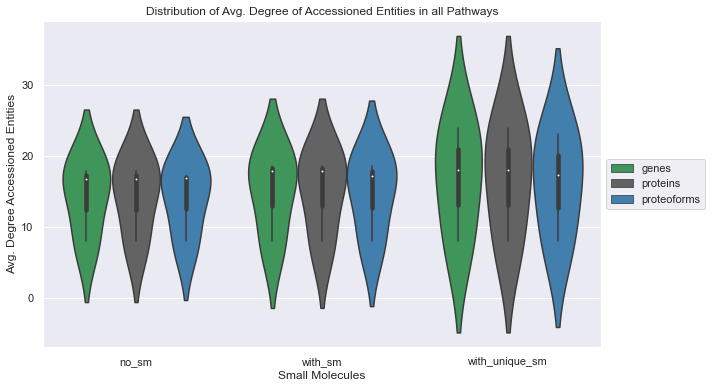

In [39]:
import matplotlib.pyplot as plt

sns.set(rc = {"figure.facecolor": "white"})

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
fig.set_size_inches(10, 6)
f = sns.violinplot(x="Small Molecules", y="Avg. Degree Accessioned Entities", hue="Entity Level",
                   data=df_deg_pathways, palette=config.COLORS_BORDER)
#ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$")) # Convert ticks to powers of 10
f.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f.set_title("Distribution of Avg. Degree of Accessioned Entities in all Pathways")

Text(0.5, 1.0, 'Distribution of Avg. Degree of Small Molecules in all Pathways')

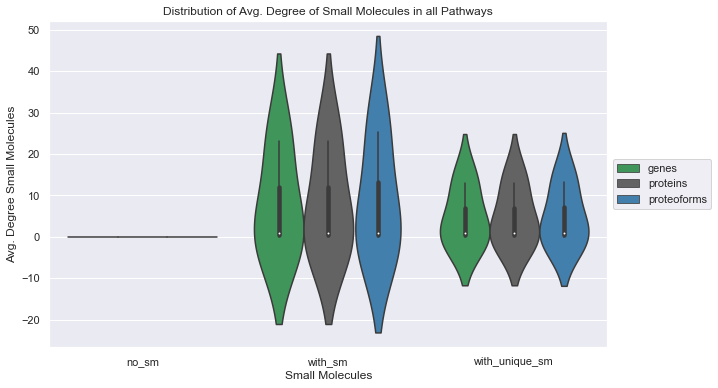

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
fig.set_size_inches(10, 6)
f = sns.violinplot(x="Small Molecules", y="Avg. Degree Small Molecules", hue="Entity Level",
                   data=df_deg_pathways, palette=config.COLORS_BORDER)
#ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$")) # Convert ticks to powers of 10
f.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f.set_title("Distribution of Avg. Degree of Small Molecules in all Pathways")

In [41]:
df_deg_pathways[
    (df_deg_pathways["Small Molecules"] == 'with_unique_sm') & (df_deg_pathways["Entity Level"] == 'proteoforms')]

,Small Molecules,Entity Level,Pathway,Min. Degree Accessioned Entities,Avg. Degree Accessioned Entities,Max. Degree Accessioned Entities,Min. Degree Small Molecules,Avg. Degree Small Molecules,Max. Degree Small Molecules
24,with_unique_sm,proteoforms,R-HSA-9613829,2,17.36,19,1,1.00,1
25,with_unique_sm,proteoforms,R-HSA-1632852,1,23.04,76,1,13.25,30
26,with_unique_sm,proteoforms,R-HSA-5205685,4,8.08,18,0,0.00,0


In [42]:
df_pathways_grouped.reset_index(inplace=True)
df_pathways_grouped

,Small Molecules,Entity Level,Min. Degree Accessioned Entities,Avg. Degree Accessioned Entities,Max. Degree Accessioned Entities,Min. Degree Small Molecules,Avg. Degree Small Molecules,Max. Degree Small Molecules
0,Not Included,genes,1.67,14.27,23.33,0.00,0.00,0.00
1,Not Included,proteins,1.67,14.27,23.33,0.00,0.00,0.00
2,Not Included,proteoforms,1.67,14.07,25.67,0.00,0.00,0.00
3,Included,genes,2.33,14.89,24.00,1.67,8.07,12.67
4,Included,proteins,2.33,14.89,24.00,1.67,8.07,12.67
5,Included,proteoforms,2.33,14.64,27.00,1.67,8.80,14.67
6,Reaction-Unique Included,genes,3.33,16.73,34.00,0.67,4.70,10.00
7,Reaction-Unique Included,proteins,3.33,16.73,34.00,0.67,4.70,10.00
8,Reaction-Unique Included,proteoforms,2.33,16.16,37.67,0.67,4.75,10.33


In [43]:
df_interactomes_temp = df_deg_interactomes[["Avg. Degree Accessioned Entities",
    "Avg. Degree Small Molecules"]]
df_interactomes_temp.reset_index(inplace=True)
df_interactomes_temp

,Small Molecules,Entity Level,Avg. Degree Accessioned Entities,Avg. Degree Small Molecules
0,Not Included,genes,82.63,0.00
1,Not Included,proteins,83.58,0.00
2,Not Included,proteoforms,94.73,0.00
3,Included,genes,88.31,45.48
4,Included,proteins,89.26,45.79
5,Included,proteoforms,99.53,48.69
6,Reaction-Unique Included,genes,112.64,15.77
7,Reaction-Unique Included,proteins,113.77,15.94
8,Reaction-Unique Included,proteoforms,118.77,16.29


In [44]:
df_degrees = pd.concat([df_interactomes_temp, df_pathways_grouped[["Avg. Degree Accessioned Entities",
    "Avg. Degree Small Molecules"]]], axis=1)
df_degrees.set_index(index, inplace=True)
df_degrees.drop(df_degrees.columns[[0,1]],axis=1,inplace=True)
df_degrees

Avg. Degree Accessioned Entities  \
Small Molecules          Entity Level                                     
Not Included             genes                                    82.63   
                         proteins                                 83.58   
                         proteoforms                              94.73   
Included                 genes                                    88.31   
                         proteins                                 89.26   
                         proteoforms                              99.53   
Reaction-Unique Included genes                                   112.64   
                         proteins                                113.77   
                         proteoforms                             118.77   

                                       Avg. Degree Small Molecules  \
Small Molecules          Entity Level                                
Not Included             genes                                0.00   
                         proteins                             0.00   
                         proteoforms                          0.00   
Included                 genes                               45.48   
                         proteins                            45.79   
                         proteoforms                         48.69   
Reaction-Unique Included genes                               15.77   
                         proteins                            15.94   
                         proteoforms                         16.29   

                                       Avg. Degree Accessioned Entities  \
Small Molecules          Entity Level                                     
Not Included             genes                                    14.27   
                         proteins                                 14.27   
                         proteoforms                              14.07   
Included                 genes                                    14.89   
                         proteins                                 14.89   
                         proteoforms                              14.64   
Reaction-Unique Included genes                                    16.73   
                         proteins                                 16.73   
                         proteoforms                              16.16   

                                       Avg. Degree Small Molecules  
Small Molecules          Entity Level                               
Not Included             genes                                0.00  
                         proteins                             0.00  
                         proteoforms                          0.00  
Included                 genes                                8.07  
                         proteins                             8.07  
                         proteoforms                          8.80  
Reaction-Unique Included genes                                4.70  
                         proteins                             4.70  
                         proteoforms                          4.75